# De Ranking da Felicidade Mundial <br>para Ranking de Mortes em todo o globo

<font color='yellow'>
Esse é apenas um projeto de poucas ideias.
</font>

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7, 8.27)})

deaths_around_the_world = pd.read_csv('cause_of_deaths.csv')

In [253]:
deaths_around_the_world.head(5)

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [254]:
deaths_around_the_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [255]:
deaths_around_the_world['Country/Territory'].nunique()

204

In [256]:
CAUSES_OF_DEATH = deaths_around_the_world.columns[3:]

Cria coluna de total de mortes

In [257]:
deaths_around_the_world['Total deaths'] = (
    deaths_around_the_world[CAUSES_OF_DEATH].sum(axis=1)
)

## Mortes ao redor do Mundo



Top 10 países com mais fatalidades

In [258]:
countries_with_the_most_fatalities = (
    deaths_around_the_world
    .drop('Year', axis=1)
    .groupby('Country/Territory')
    .sum()
    .reset_index()
    [['Country/Territory', 'Total deaths']]
    .sort_values('Total deaths', ascending =False)[:10]
)

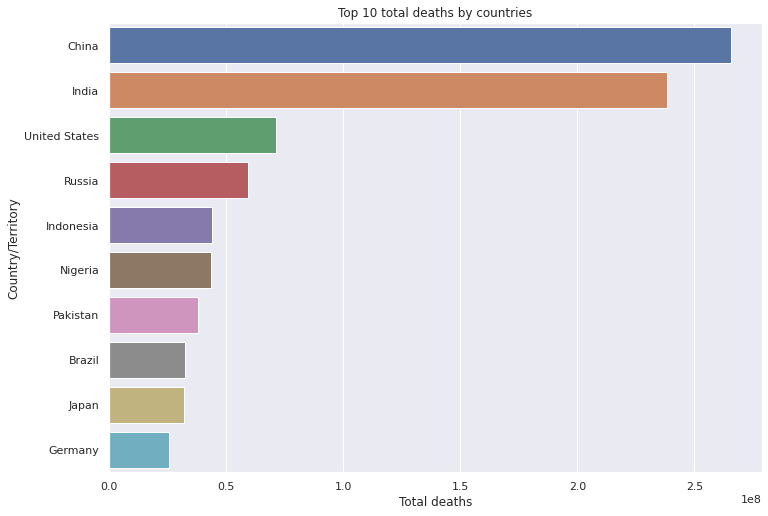

In [259]:
sns.barplot(
    data=countries_with_the_most_fatalities,
    x='Total deaths',
    y='Country/Territory'
).set_title('Top 10 total deaths by countries');

Top 10 maiores registros de mortes

In [260]:
top_10_biggest_death_records = (
    deaths_around_the_world
    .sort_values('Total deaths', ascending=False)
    .head(10)
    [['Country/Territory', 'Year', 'Total deaths']]
)

Conforme mostrado no gráfico anterior a China lidera no ranking de países com maior número de fatalidades, e tendo vista os registros ao redor do mundo, todas elas aconteceram na década passada como mostra o gráfico abaixo.

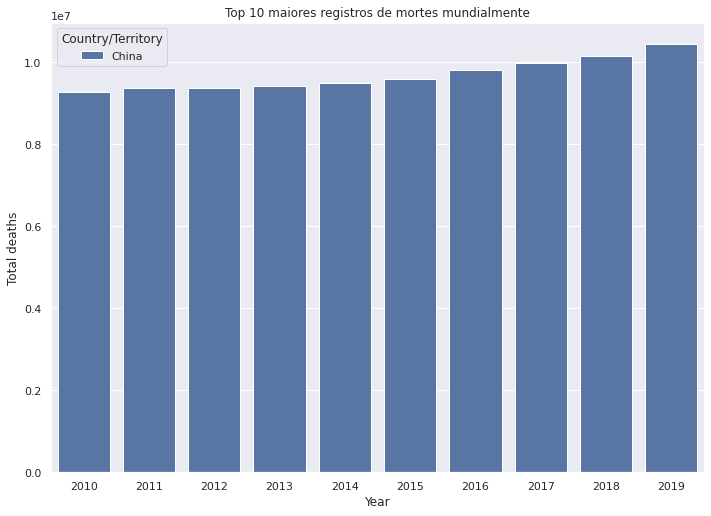

In [261]:
axs = sns.barplot(
    data=top_10_biggest_death_records,
    x='Year',
    y='Total deaths',
    hue='Country/Territory',
)
axs.set_title('Top 10 maiores registros de mortes mundialmente');

In [262]:
number_of_deaths_in_the_world_by_causes = (
    deaths_around_the_world[CAUSES_OF_DEATH].sum()
)

percent_by_cause = (
    (
        number_of_deaths_in_the_world_by_causes 
        / number_of_deaths_in_the_world_by_causes.sum()
    )
    .sort_values(ascending=False)
)

others = percent_by_cause.iloc[3:]
sum_others = others.sum()
percent_by_cause = percent_by_cause.drop(percent_by_cause.index[3:])
percent_by_cause['Others'] = sum_others

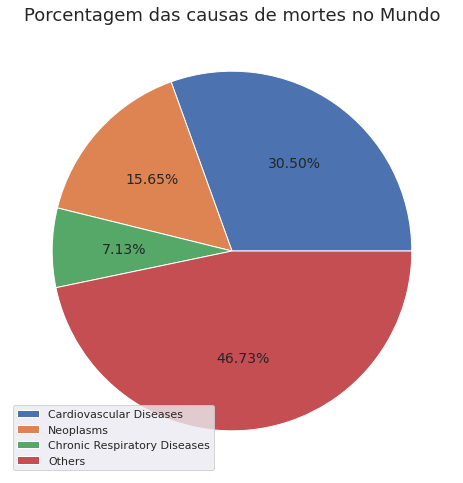

In [263]:
plt.pie(
    percent_by_cause, 
    autopct="%.2f%%", 
    textprops={'fontsize': 14}
);
plt.title("Porcentagem das causas de mortes no Mundo", size=18)
plt.legend(percent_by_cause.index, loc='lower left')
plt.show()

In [264]:
deaths_around_the_world_2 = deaths_around_the_world.melt(
    id_vars=['Code', 'Year'],
    value_vars=CAUSES_OF_DEATH,
    var_name='Causes', 
    value_name='Num of Deaths'
)

Mortes por má-nutrição

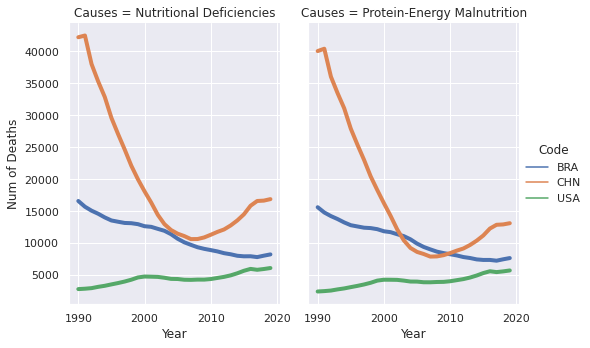

In [265]:
countries = ['CHN', 'BRA', 'USA']
causes = ['Protein-Energy Malnutrition', 'Nutritional Deficiencies']

deaths_by_countries = deaths_around_the_world_2[
    deaths_around_the_world_2['Code'].isin(countries)
    & deaths_around_the_world_2['Causes'].isin(causes)
]

sns.relplot(
    data=deaths_by_countries,
    x="Year", y="Num of Deaths",
    hue="Code", col="Causes",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
    linewidth=4
);

Mortes por conflito e terrorismo

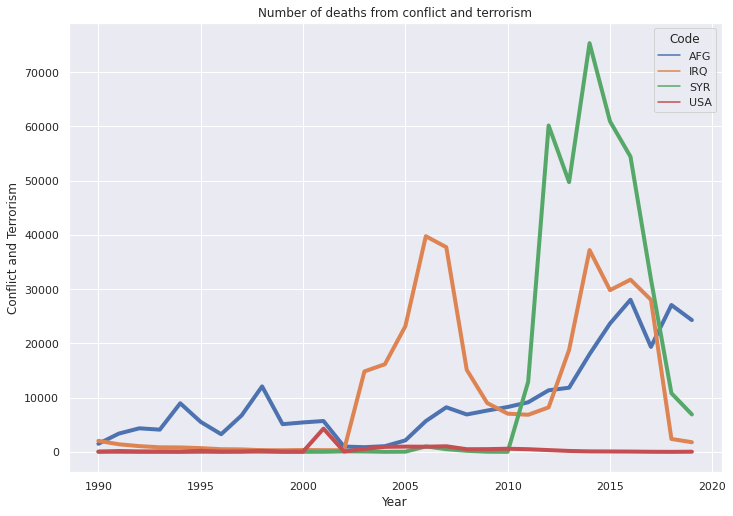

In [266]:
cause = 'Conflict and Terrorism'
countries = ['AFG', 'IRQ', 'SYR', 'USA']
countries_data = (
    deaths_around_the_world[deaths_around_the_world['Code'].isin(countries)]
)

sns.lineplot(
    data=countries_data, 
    x="Year", 
    y=cause, 
    hue = 'Code',
    linewidth=4
).set_title('Number of deaths from conflict and terrorism');

Mortes por confusão/briga

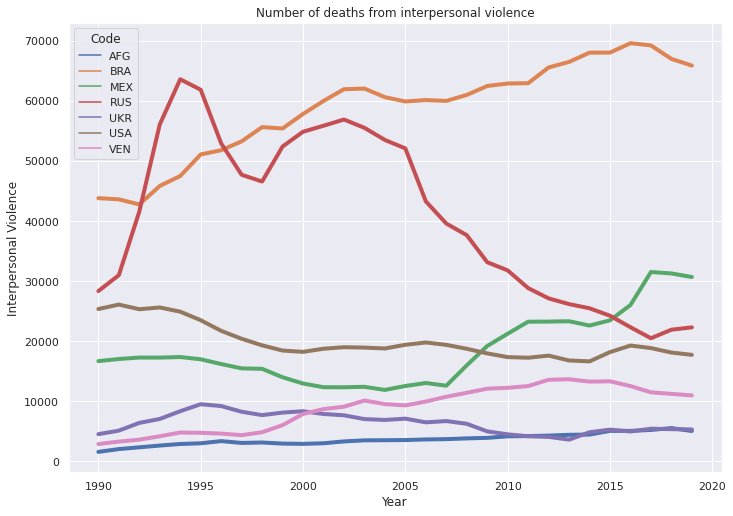

In [267]:
cause = 'Interpersonal Violence'
countries = ['AFG', 'USA', 'VEN', 'UKR', 'MEX', 'RUS', 'BRA']
dados_pais = deaths_around_the_world[
    deaths_around_the_world['Code'].isin(countries)
]
sns.lineplot(
    data=dados_pais, 
    x="Year", y=cause, 
    hue='Code',
    linewidth=4
).set_title('Number of deaths from interpersonal violence');

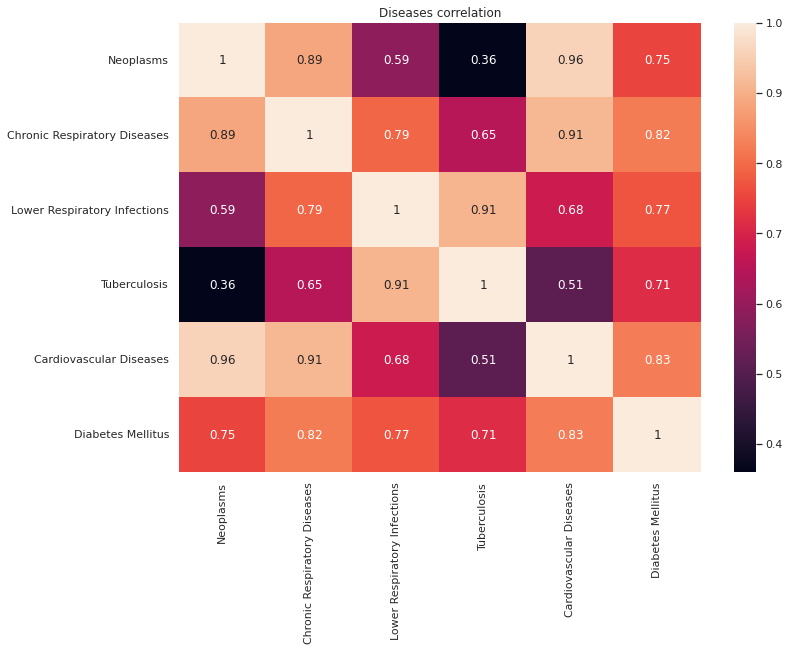

In [268]:
sns.heatmap(
    data=deaths_around_the_world[[
        'Neoplasms', 
        'Chronic Respiratory Diseases', 
        'Lower Respiratory Infections', 
        'Tuberculosis', 
        'Cardiovascular Diseases',
        'Diabetes Mellitus']].corr(),
    annot=True
).set_title('Diseases correlation');

## Mortes no Brasil

Seleciona apenas os registros do Brasil

In [269]:
brazil_deaths = (
    deaths_around_the_world[
        deaths_around_the_world['Country/Territory'] == 'Brazil'
    ]
    .drop(['Country/Territory', 'Code'], axis=1)
    .set_index('Year')
)

Top 9 causas de morte mais comuns no Brasil

In [270]:
most_common_causes_of_death_in_Brazil = (
    brazil_deaths[CAUSES_OF_DEATH]
    .sum()
    .sort_values(ascending=False)
    .head(9)
    .index
)

In [271]:
main_causes_of_death_in_Brazil_by_year = brazil_deaths[
    most_common_causes_of_death_in_Brazil
]

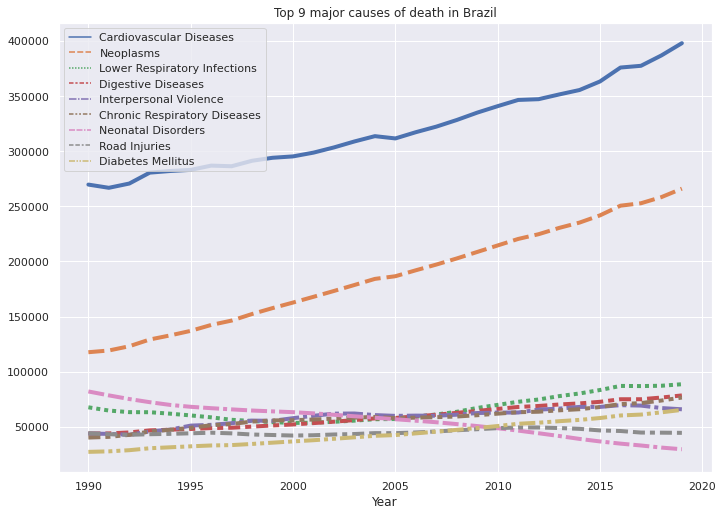

In [272]:
sns.lineplot(
    data=main_causes_of_death_in_Brazil_by_year,
    linewidth=4
).set_title('Top 9 major causes of death in Brazil');

In [273]:
number_of_deaths_in_brazil_by_causes = brazil_deaths[CAUSES_OF_DEATH].sum()

percent_by_cause = (
    (
        number_of_deaths_in_brazil_by_causes 
        / number_of_deaths_in_brazil_by_causes.sum()
    )
    .sort_values(ascending=False)
)

In [274]:
others = percent_by_cause.iloc[3:]
sum_others = others.sum()
percent_by_cause = percent_by_cause.drop(percent_by_cause.index[3:])
percent_by_cause['Others'] = sum_others

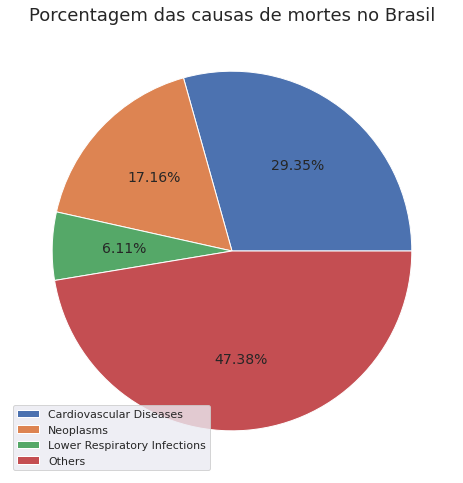

In [275]:
plt.pie(
    percent_by_cause, 
    autopct="%.2f%%", 
    textprops={'fontsize': 14}
);
plt.title("Porcentagem das causas de mortes no Brasil", size=18)
plt.legend(percent_by_cause.index, loc='lower left')
plt.show()

Mortes por desatres naturais

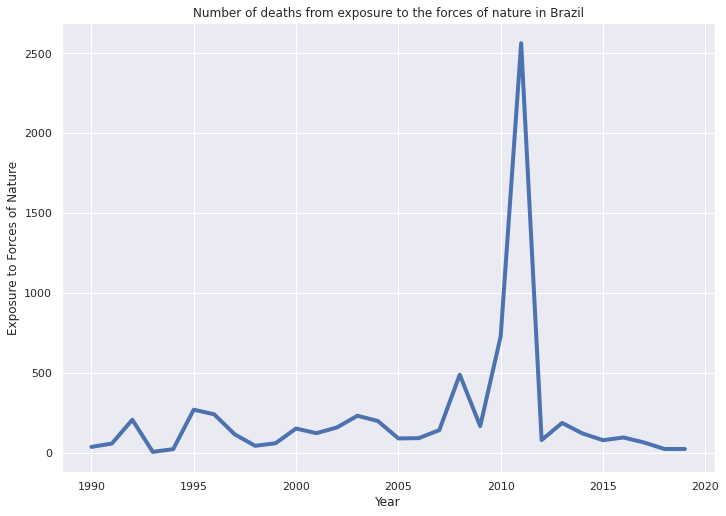

In [276]:
sns.lineplot(
    data=brazil_deaths['Exposure to Forces of Nature'],
    linewidth=4
).set_title('Number of deaths from exposure to the forces of nature in Brazil');

Mortes por HIV/AIDS

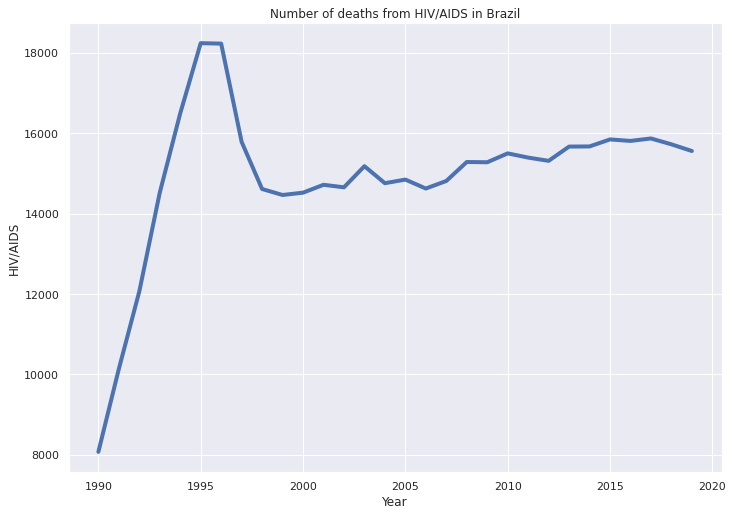

In [277]:
sns.lineplot(
    data=brazil_deaths['HIV/AIDS'],
    linewidth=4
).set_title('Number of deaths from HIV/AIDS in Brazil');

Mortes por Diabetes e Transtornos Neonatais

Text(0.5, 1.0, 'Number of deaths from Diabetes Mellitus or Neonatal Disorders in Brazil')

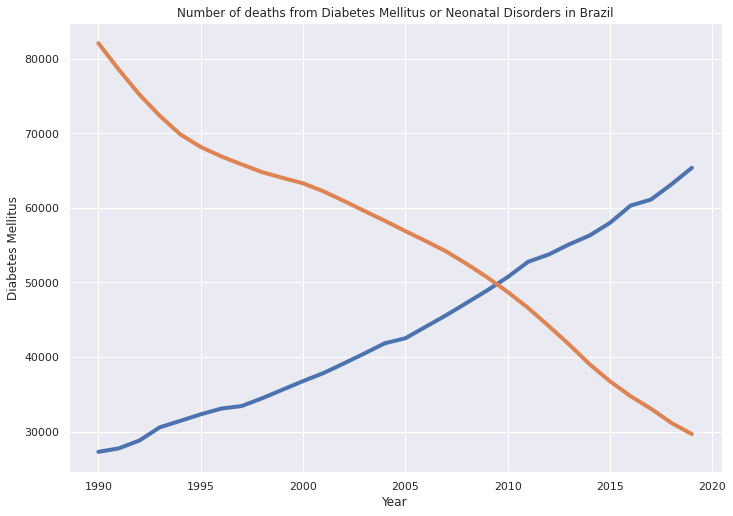

In [278]:
sns.lineplot(
    data=brazil_deaths['Diabetes Mellitus'],
    linewidth=4
)
sns.lineplot(
    data=brazil_deaths['Neonatal Disorders'],
    linewidth=4
).set_title('Number of deaths from Diabetes Mellitus or Neonatal Disorders in Brazil')